## Question 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt('faces.dat')
print(data.shape)

(400, 4096)


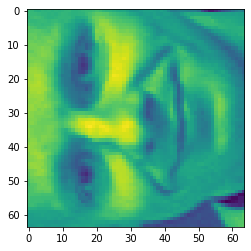

In [3]:
#Displaying the 200th image (part a)
imageDisplay = data[200].reshape(-1, 64)
plt.imshow(imageDisplay)

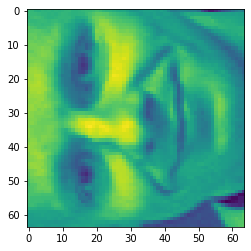

In [4]:
#Removing the mean of the images and then displaying the 200th image (part b)
dataMean = data.mean(axis = 1)
dataMean = dataMean.reshape((400, 1))
newData = data - dataMean

imageDisplayMean = newData[200].reshape(-1, 64)
plt.imshow(imageDisplayMean)

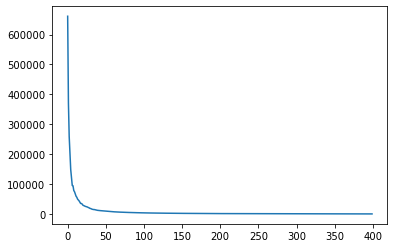

In [5]:
#Perform PCA (part c)
from sklearn import decomposition

pca = decomposition.PCA(n_components = 400)
pcaData = pca.fit_transform(newData)
plt.plot(pca.explained_variance_)

In [6]:
print(pca.explained_variance_[399])

1.332889338632033e-26


#### Why is the last eigenvalue 0? (part d)

The last eigenvalue is 0 because when we sorted by descending order, we put the eigenvalues into an array of most significant to least significant by variance.  Therefore we put the least impactful eigenvalues at the end of the array since they don't give us much information and are not important for principal components.  And in this case with the eigenvalue being 0, it is no help at all and can get rid of it since it is so useless compared to our other eigenvalues/eigenvectors.

In [7]:
print(pca.explained_variance_ratio_)

[1.81546669e-01 1.01765417e-01 7.10416016e-02 5.59660584e-02
 4.06893946e-02 3.34214795e-02 2.61354407e-02 2.58630917e-02
 2.15211774e-02 2.03398109e-02 1.82889941e-02 1.62676667e-02
 1.52905250e-02 1.35884849e-02 1.27567221e-02 1.19572963e-02
 1.07786066e-02 9.58763633e-03 9.53759783e-03 9.04259998e-03
 7.99512799e-03 7.61196771e-03 7.33871360e-03 6.97001650e-03
 6.76430640e-03 6.59073167e-03 6.30699801e-03 5.88069569e-03
 5.63022044e-03 5.14243739e-03 4.98559065e-03 4.66560733e-03
 4.31349681e-03 4.15042730e-03 4.02153004e-03 3.99790249e-03
 3.80722799e-03 3.58880241e-03 3.51131201e-03 3.31546390e-03
 3.26026648e-03 3.17734432e-03 3.10838291e-03 3.00000831e-03
 2.93483394e-03 2.85184262e-03 2.82686683e-03 2.71931916e-03
 2.60842142e-03 2.52944318e-03 2.45389852e-03 2.42578712e-03
 2.31270336e-03 2.27084676e-03 2.21528298e-03 2.18206454e-03
 2.10929037e-03 2.06074937e-03 2.01589614e-03 2.00739800e-03
 1.94547444e-03 1.92800347e-03 1.87863442e-03 1.83499865e-03
 1.79167765e-03 1.746266

#### What dimensionality (part e)
Based on the eigenvalues, the number of principle components I would want to keep would be around 10 since they are still giving a decent amount of information at ~2% and anything past that is encroaching very close to 0.  The reason I would choose 10 principal components is due to most of the information being held within the first few components with it quickly tapering off around this number.  Anything past 10 seems to be very getting quite close to 0, and everything before 10 is still a significantly high eigenvalue therefore giving it a reason to stay.

array([[-0.02850114, -0.02948162, -0.03092016, ...,  0.02024754,
         0.0203227 ,  0.02030941],
       [ 0.00091393, -0.00167801, -0.00518644, ..., -0.0174063 ,
        -0.01792097, -0.01667457],
       [ 0.01053463,  0.00905114,  0.00783086, ...,  0.04820122,
         0.05126916,  0.0534062 ],
       [-0.01712145, -0.01728437, -0.01689771, ..., -0.03240061,
        -0.03217932, -0.03181161],
       [ 0.03143879,  0.03048978,  0.03019575, ..., -0.00617891,
        -0.00722634, -0.00612089]])

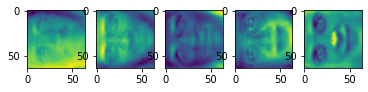

In [8]:
#Display the top-5 leading eigenvectors (part f)
figure, ax = plt.subplots(1, 5)
ax[0].imshow(pca.components_[0].reshape(-1, 64))
ax[1].imshow(pca.components_[1].reshape(-1, 64))
ax[2].imshow(pca.components_[2].reshape(-1, 64))
ax[3].imshow(pca.components_[3].reshape(-1, 64))
ax[4].imshow(pca.components_[4].reshape(-1, 64))

pca.components_[:5]

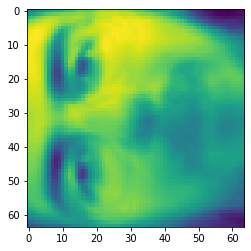

In [9]:
#Displaying the 100th image reconstruction with various numbers of principal components
pca = decomposition.PCA(n_components = 10)
pcaData = pca.fit_transform(newData)
pcaRe = pca.inverse_transform(pcaData)
plt.imshow(pcaRe[100].reshape(-1, 64))

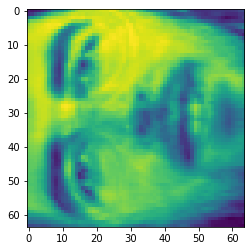

In [10]:
pca = decomposition.PCA(n_components = 100)
pcaData = pca.fit_transform(newData)
pcaRe = pca.inverse_transform(pcaData)
plt.imshow(pcaRe[100].reshape(-1, 64))

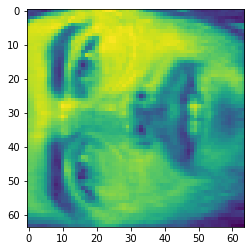

In [11]:
pca = decomposition.PCA(n_components = 200)
pcaData = pca.fit_transform(newData)
pcaRe = pca.inverse_transform(pcaData)
plt.imshow(pcaRe[100].reshape(-1, 64))

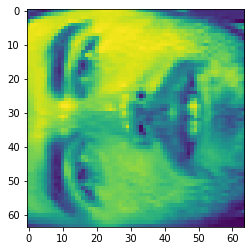

In [12]:
pca = decomposition.PCA(n_components = 399)
pcaData = pca.fit_transform(newData)
pcaRe = pca.inverse_transform(pcaData)
plt.imshow(pcaRe[100].reshape(-1, 64))

In [ ]:
#Code written by Ryan Howarth
#Student Number 251109839